In [6]:
# import os
import src.traclus.traclus as tr
import numpy as np
# import pickle
# from matplotlib import pyplot as plt
# import seaborn as sns
# from sklearn.cluster import DBSCAN
from scipy import io

In [7]:
data_mat = io.loadmat('./data/TRAFFIC_trans.mat')
data = data_mat['data']
# data_subset1 = data[0:5]
# data_subset2 = data[150:155]
# data_subset3 = data[40:45]
# data_subset4 = data[200:205]
# data_subset5 = data[280:285]
# data_subset = np.vstack((data_subset1, data_subset2, data_subset3, data_subset4, data_subset5))
# # data_subset = np.vstack((data_subset, data_subset3))
# # data_subset = np.vstack
data_subset = data[0:20]

In [8]:
# # # 绘制轨迹图像
# num = data_subset.shape[0]
# plt.figure(figsize=(10, 10), dpi=200)
# plt.xlim(0, 100)
# plt.ylim(0, 100)
# for i in range(num):
#     plt.plot(data_subset[i, :, 0], data_subset[i, :, 1])

In [9]:
def data_input(data):
    length = data.shape[0]
    input = []
    for i in range(length):
        input.append(data[i])
    return input


In [10]:
trajectory = data_input(data_subset)

In [11]:
output = tr.traclus(trajectory, directional=True, min_samples=18, d_weights=[9, 10, 9])
partitions                  = output[0]
segments                    = output[1]
dist_matrix                 = output[2]
clusters                    = output[3]
cluster_assignments         = output[4]
representative_trajectories = output[5]
# partitions, segments, dist_matrix, clusters, cluster_assignments, representative_trajectories = tr.traclus(trajectory, directional=True, min_samples=11, d_weights=[9, 1, 9])

In [13]:
len(clusters)

1

In [26]:
data_subset[0]

array([[ 2.54435484, 29.74308756],
       [ 4.25675107, 30.131137  ],
       [ 5.97220383, 30.54089841],
       [ 7.69446541, 30.98982629],
       [ 9.42857284, 31.48762109],
       [11.18122031, 32.03418844],
       [12.96080657, 32.61954758],
       [14.77706482, 33.22579093],
       [16.64021564, 33.83066951],
       [18.55963394, 34.41189647],
       [20.54209711, 34.95104457],
       [22.58979667, 35.43608638],
       [24.69845174, 35.86212987],
       [26.85602037, 36.23051835],
       [29.04257204, 36.54693124],
       [31.23175686, 36.81927612],
       [33.3939407 , 37.05599999],
       [35.50055285, 37.26510437],
       [37.52871882, 37.45380686],
       [39.465054  , 37.62858863],
       [41.30769514, 37.79534463],
       [43.06617609, 37.95946744],
       [44.75938164, 38.12585367],
       [46.41227688, 38.29893191],
       [48.05225846, 38.48281659],
       [49.70582514, 38.68159039],
       [51.39596242, 38.89956105],
       [53.14034495, 39.1412175 ],
       [54.95028132,

In [14]:
len(clusters)
clusters[0]

[array([[ 2.54435484, 29.74308756],
        [ 7.69446541, 30.98982629]]),
 array([[ 7.69446541, 30.98982629],
        [12.96080657, 32.61954758]]),
 array([[12.96080657, 32.61954758],
        [18.55963394, 34.41189647]]),
 array([[18.55963394, 34.41189647],
        [24.69845174, 35.86212987]]),
 array([[24.69845174, 35.86212987],
        [31.23175686, 36.81927612]]),
 array([[31.23175686, 36.81927612],
        [37.52871882, 37.45380686]]),
 array([[37.52871882, 37.45380686],
        [43.06617609, 37.95946744]]),
 array([[43.06617609, 37.95946744],
        [48.05225846, 38.48281659]]),
 array([[48.05225846, 38.48281659],
        [53.14034495, 39.1412175 ]]),
 array([[53.14034495, 39.1412175 ],
        [58.77810374, 40.03868335]]),
 array([[58.77810374, 40.03868335],
        [64.92107064, 41.11254886]]),
 array([[64.92107064, 41.11254886],
        [71.16054895, 41.99052253]]),
 array([[71.16054895, 41.99052253],
        [77.10266853, 42.43534624]]),
 array([[77.10266853, 42.43534624],
  

In [16]:
# # 保存结果
# io.savemat('./result/traclus_results_6_30_3', {'nopar_multi':1.3, 'min_sample':11, 'd_weight':[9, 1, 9], 'partitions':partitions, 'segments':segments, 'dist_matrix':dist_matrix, 'clusters':clusters, 'cluster_assignments':cluster_assignments, 'representative_trajectories':representative_trajectories})

In [27]:
def single_trajectory_show(trajectory, color = 'blue'):
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.plot(trajectory[:, 0], trajectory[:, 1], color = color, marker = 'x')
    

def show_trajectories(trajectories, color = 'blue'):
    for trajectory in trajectories:
        single_trajectory_show(trajectory, color = color)

def show_clusters_and_representative(clusters, representative_trajectories, number):
    show_trajectories(clusters[number])
    single_trajectory_show(representative_trajectories[number], color='red')  

def show_all_cluandrep(clusters, representative_trajectories):
    count = len(clusters)
    for i in range(count):
        if(representative_trajectories[i].shape[0]==0):continue
        # if(i==0):continue
        show_clusters_and_representative(clusters,representative_trajectories, i)

In [17]:
# def save_fig(clus, rep_tra, tag):
#     # 显示所有轨迹
#     plt.figure(figsize=(8, 8), dpi=200)
#     show_trajectories(data_subset, color = 'green')
#     # show_trajectories(clusters[0])
#     # single_trajectory_show(representative_trajectories[0], 'red')
#     # single_trajectory_show(representative_trajectories[0], color='red')
#     show_all_cluandrep(clus, rep_tra)
#     plt.savefig(f'./fig/{tag}.png')

In [10]:
# # 估计权重
# for i in range(1, 10, 2):
#     for j in range(1, 10, 2):
#         # for k in range(1, 10, 2):
#             out = tr.traclus(trajectory, directional=True, min_samples=15, mdl_weights=[1, 1, 1], d_weights=[i, 1, j])
#             clusters = out[3]
#             representative_trajectories = out[5]
#             save_fig(clusters, representative_trajectories, [i, 1, j])

In [11]:
# # partitions, segments, dist_matrix, clusters, cluster_assignments, representative_trajectories
# for i in range(10, 11, 2):
#     out = tr.traclus(trajectory, directional=True, min_samples=i, d_weights=[3, 1, 3])
#     clusters = out[3]
#     representative_trajectories = out[5]
#     save_fig(clusters, representative_trajectories, [i, 3, 1, 3])

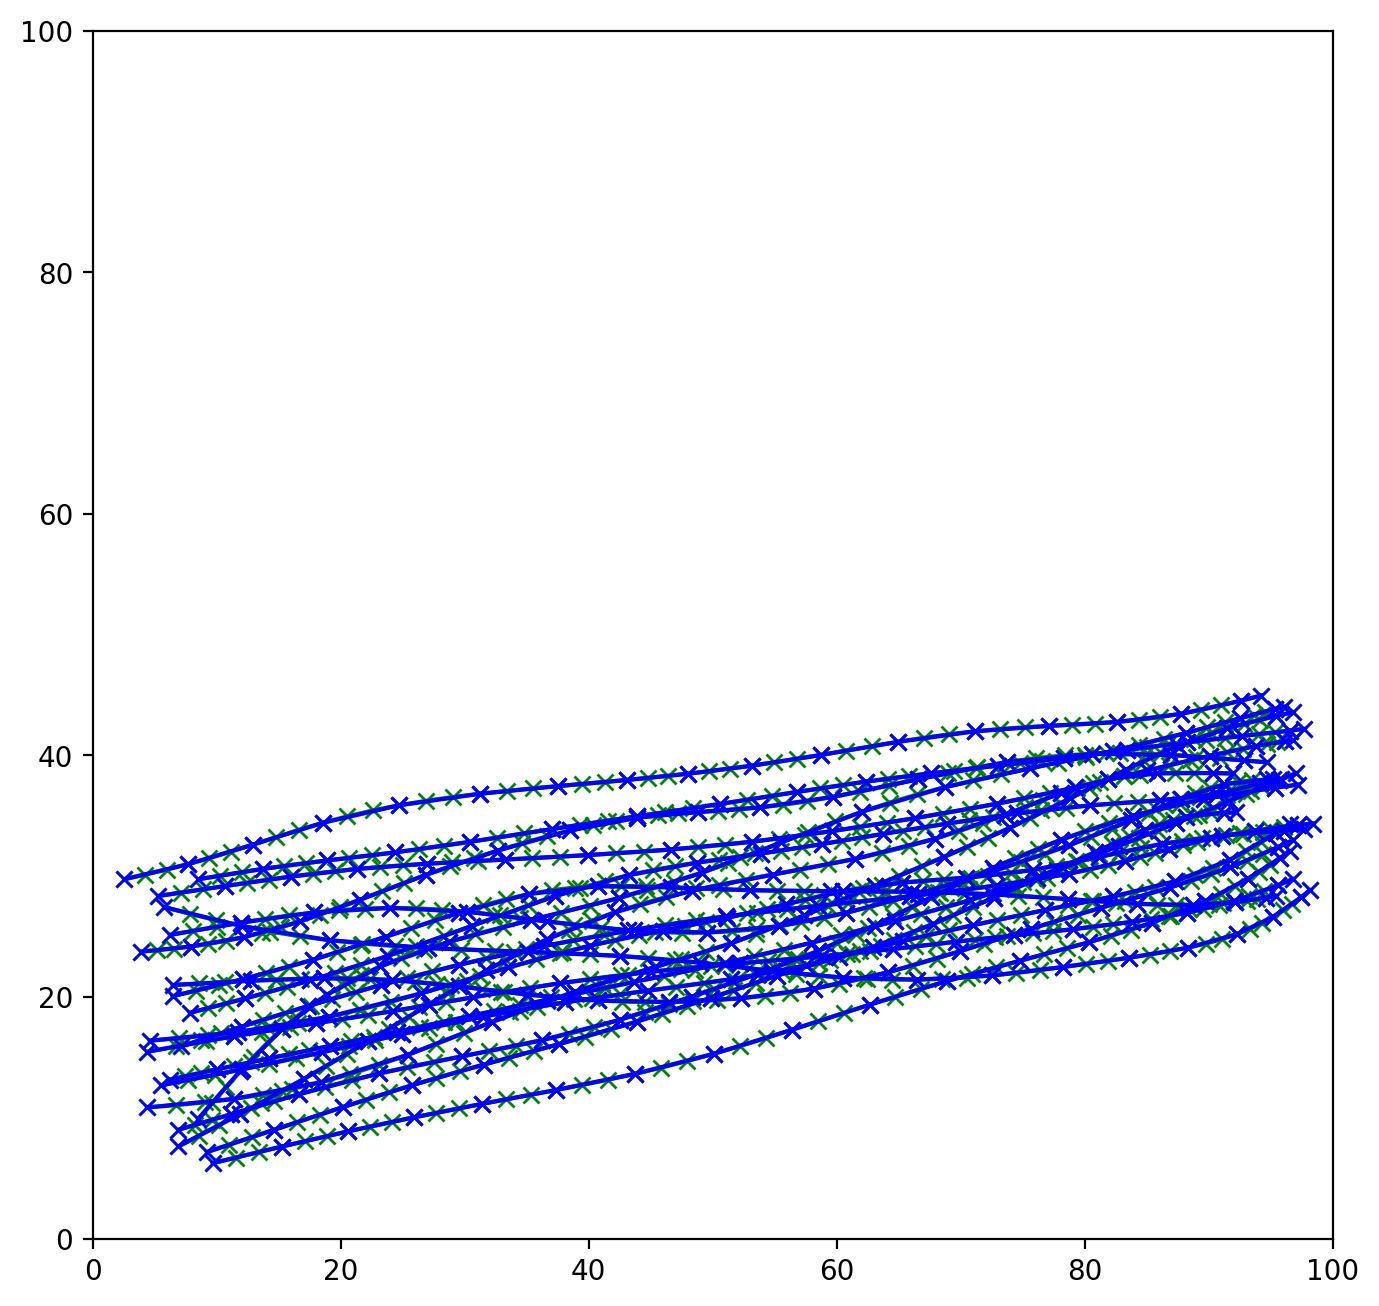

In [28]:
# 显示所有轨迹
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), dpi=200)
show_trajectories(data_subset, color = 'green')
# save_fig(clusters, representative_trajectories, [11, 9, 1, 9, 300])
show_trajectories(clusters[0])
# single_trajectory_show(representative_trajectories[0], color='red')
# show_all_cluandrep(clusters, representative_trajectories)